In [1]:
import os

In [2]:
dataset_path = 'C:/pythonn/plant_desease/'

In [3]:
num_healthy_images = len(os.listdir(os.path.join(dataset_path, 'healthy_new')))
num_rust_images = len(os.listdir(os.path.join(dataset_path, 'rust_new')))

In [4]:
print("Number of healthy images:", num_healthy_images)
print("Number of rust images:", num_rust_images)

Number of healthy images: 1764
Number of rust images: 1776


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
labels = ['healthy', 'rust']
counts = [num_healthy_images, num_rust_images]

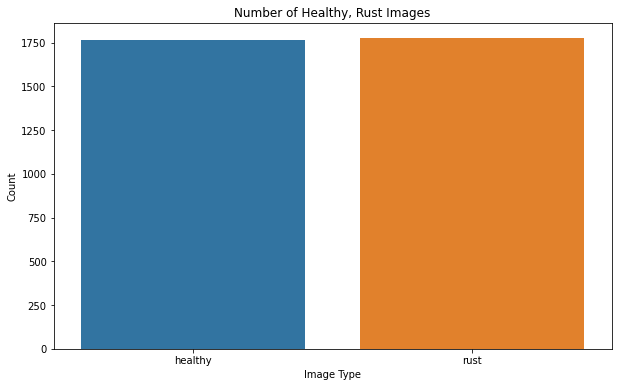

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=counts)
plt.xlabel('Image Type')
plt.ylabel('Count')
plt.title('Number of Healthy, Rust Images')
plt.show()

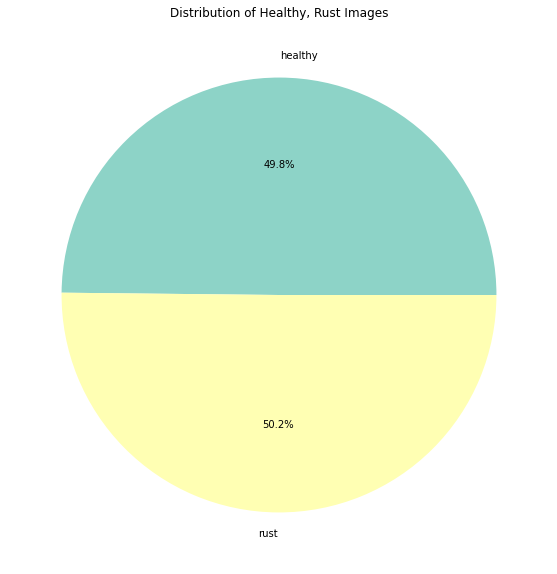

In [8]:
plt.figure(figsize=(10, 10))
sns.set_palette("Set3") 
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Healthy, Rust Images')
plt.show()

In [9]:
import plotly.express as px

In [10]:
fig = px.bar(x=labels, y=counts)
fig.update_layout(
    xaxis_title='Image Type',
    yaxis_title='Count',
    title='Number of Healthy, Rust Images',
    width=800,
    height=500
)
fig.show()

In [11]:
import plotly.graph_objects as go

In [12]:
fig = go.Figure(data=[go.Pie(labels=labels, values=counts, textinfo='percent', insidetextorientation='radial')])
fig.update_layout(
    title='Distribution of Healthy, Rust Images',
    width=800,
    height=500
)
fig.show()

In [13]:
healthy_path = os.path.join(dataset_path, 'healthy_new')
rust_path = os.path.join(dataset_path, 'rust_new')

In [14]:
healthy_files = os.listdir(healthy_path)

In [15]:
import cv2

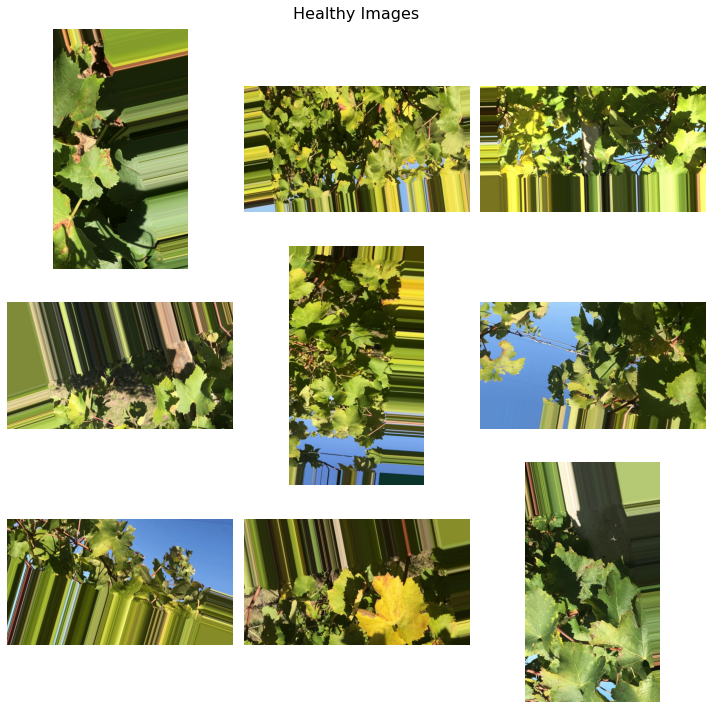

In [16]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
fig.suptitle('Healthy Images', fontsize=16)
axes = axes.ravel()

for i, image_file in enumerate(healthy_files[:9]):
    image_path = os.path.join(healthy_path, image_file)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    axes[i].imshow(image)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [17]:
rust_files = os.listdir(rust_path)

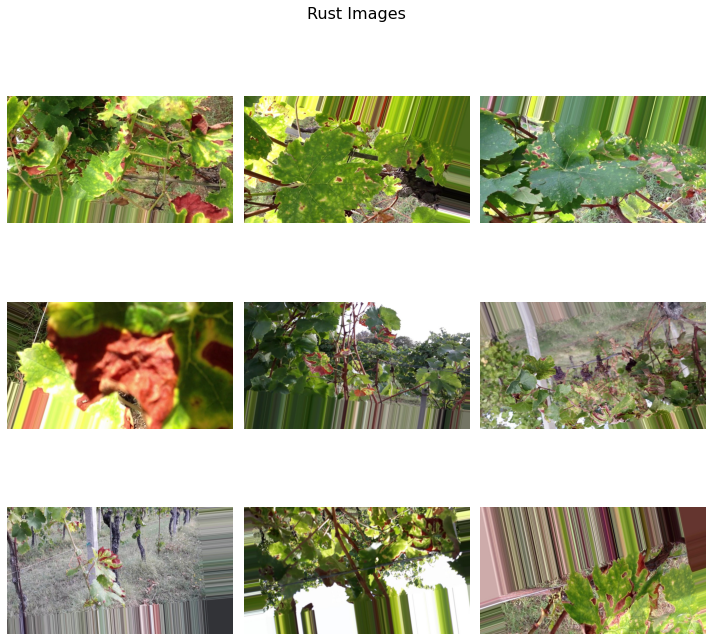

In [18]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
fig.suptitle('Rust Images', fontsize=16)
axes = axes.ravel()

for i, image_file in enumerate(rust_files[:9]):
    image_path = os.path.join(rust_path, image_file)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    axes[i].imshow(image)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [19]:
def load_and_preprocess_images(image_folder):
    image_files = os.listdir(image_folder)
    images = []
    for image_file in image_files:
        image_path = os.path.join(image_folder, image_file)
        image = cv2.imread(image_path)
        if image is not None:
            image = cv2.resize(image, (256, 256))
            images.append(image)
    return images

In [20]:
healthy_files = load_and_preprocess_images(os.path.join(dataset_path, 'healthy_new'))
rust_files = load_and_preprocess_images(os.path.join(dataset_path, 'rust_new'))

In [21]:
import numpy as np

In [22]:
healthy_files = np.array(healthy_files).reshape(-1, 256, 256, 3)
rust_files = np.array(rust_files).reshape(-1, 256, 256, 3)

In [23]:
all_files = np.concatenate((healthy_files, rust_files), axis=0)

In [24]:
all_labels = np.concatenate((
    np.zeros(len(healthy_files)),
    np.ones(len(rust_files)),
))

In [25]:
all_files_flat = all_files.reshape(-1, all_files.shape[1] * all_files.shape[2] * all_files.shape[3])

In [26]:
healthy_files_new = all_files_flat[all_labels == 0].reshape(-1, 256, 256, 3)
rust_files_new = all_files_flat[all_labels == 1].reshape(-1, 256, 256, 3)

print("Healthy files shape:", healthy_files_new.shape)
print("Rust files shape:", rust_files_new.shape)

Healthy files shape: (1764, 256, 256, 3)
Rust files shape: (1776, 256, 256, 3)


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [28]:
healthy_files_new = healthy_files_new.astype('float32') / 255.0
rust_files_new = rust_files_new.astype('float32') / 255.0

In [29]:
image_shape = (128,128)

In [30]:
X = np.concatenate((healthy_files_new, rust_files_new))
y = np.concatenate(([0]*1764, [1]*1776))

In [31]:
X_resized = np.array([cv2.resize(image, image_shape) for image in X])
X_flattened = X_resized.reshape(X_resized.shape[0], -1)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_flattened, y, test_size=0.2, stratify = y, random_state=42)

In [33]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [34]:
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8234463276836158


In [35]:
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [36]:
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)

F1 Score: 0.8213891904171232
Precision: 0.8396024922277393
Recall: 0.8234463276836158
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.93      0.84       353
           1       0.91      0.72      0.80       355

    accuracy                           0.82       708
   macro avg       0.84      0.82      0.82       708
weighted avg       0.84      0.82      0.82       708

Confusion Matrix:
 [[329  24]
 [101 254]]


In [37]:
import scikitplot as skplt

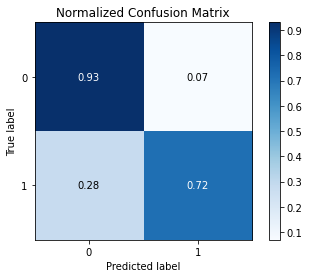

In [38]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

In [39]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [40]:
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)

Accuracy: 0.8488700564971752


In [41]:
f1 = f1_score(y_test, y_pred_rf, average='weighted')
precision = precision_score(y_test, y_pred_rf, average='weighted')
recall = recall_score(y_test, y_pred_rf, average='weighted')
classification_rep = classification_report(y_test, y_pred_rf)
conf_matrix = confusion_matrix(y_test, y_pred_rf)

print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)

F1 Score: 0.8480508574844389
Precision: 0.8569278801661979
Recall: 0.8488700564971752
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.92      0.86       353
           1       0.91      0.77      0.84       355

    accuracy                           0.85       708
   macro avg       0.86      0.85      0.85       708
weighted avg       0.86      0.85      0.85       708

Confusion Matrix:
 [[326  27]
 [ 80 275]]


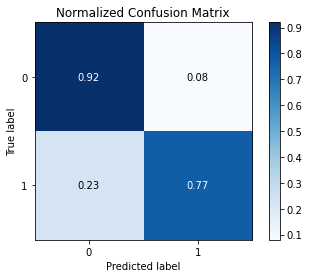

In [42]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_rf, normalize=True)
plt.show()

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [45]:
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy_dt)

Accuracy: 0.731638418079096


In [46]:
f1 = f1_score(y_test, y_pred_dt, average='weighted')
precision = precision_score(y_test, y_pred_dt, average='weighted')
recall = recall_score(y_test, y_pred_dt, average='weighted')
classification_rep = classification_report(y_test, y_pred_dt)
conf_matrix = confusion_matrix(y_test, y_pred_dt)

print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)

F1 Score: 0.7315484501158085
Precision: 0.732031221678786
Recall: 0.731638418079096
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.75      0.74       353
           1       0.74      0.71      0.73       355

    accuracy                           0.73       708
   macro avg       0.73      0.73      0.73       708
weighted avg       0.73      0.73      0.73       708

Confusion Matrix:
 [[265  88]
 [102 253]]


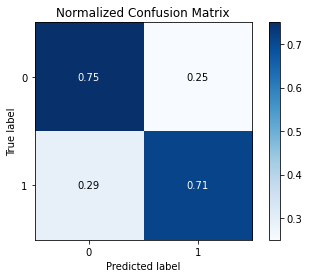

In [47]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_dt, normalize=True)
plt.show()

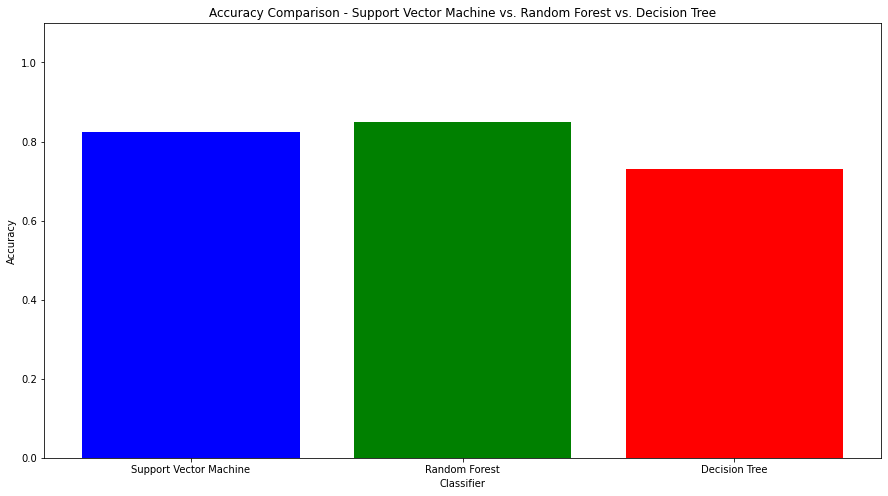

In [48]:
plt.figure(figsize=(15, 8))
classifiers = ['Support Vector Machine', 'Random Forest', 'Decision Tree']
accuracies = [accuracy, accuracy_rf, accuracy_dt]
plt.bar(classifiers, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison - Support Vector Machine vs. Random Forest vs. Decision Tree')
plt.ylim(0, 1.1)
plt.show()

In [49]:
fig = px.bar(x=classifiers, y=accuracies, color=classifiers,
             labels={'x': 'Classifier', 'y': 'Accuracy'},
             title='Accuracy Comparison - Support Vector Machine vs. Random Forest vs. Decision Tree')
fig.show()

In [50]:
X_train_new = X_train.reshape(-1, 128, 128, 3)
X_test_new = X_test.reshape(-1, 128, 128, 3)

In [51]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

In [52]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [53]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [54]:
model.fit(X_train_new, y_train, epochs= 5, validation_data=(X_test_new, y_test))

Epoch 1/5
89/89 [==============================] - 39s 428ms/step - loss: 0.4281 - accuracy: 0.7832 - val_loss: 0.1597 - val_accuracy: 0.9463
Epoch 2/5
89/89 [==============================] - 41s 456ms/step - loss: 0.1172 - accuracy: 0.9594 - val_loss: 0.0604 - val_accuracy: 0.9831
Epoch 3/5
89/89 [==============================] - 33s 366ms/step - loss: 0.0859 - accuracy: 0.9675 - val_loss: 0.0546 - val_accuracy: 0.9746
Epoch 4/5
89/89 [==============================] - 31s 350ms/step - loss: 0.0455 - accuracy: 0.9845 - val_loss: 0.0456 - val_accuracy: 0.9845
Epoch 5/5
89/89 [==============================] - 32s 365ms/step - loss: 0.0290 - accuracy: 0.9905 - val_loss: 0.0461 - val_accuracy: 0.9845


In [55]:
test_loss, test_acc = model.evaluate(X_test_new, y_test)
print("Test accuracy:", test_acc)

23/23 [==============================] - 2s 95ms/step - loss: 0.0461 - accuracy: 0.9845
Test accuracy: 0.9844632744789124


In [56]:
y_pred = (model.predict(X_test_new) > 0.5).astype("int32")

23/23 [==============================] - 2s 100ms/step


In [57]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [58]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9844632768361582
Precision: 0.9699453551912568
Recall: 1.0
F1 Score: 0.9847434119278778


In [59]:
# Early detection typically involves monitoring a model's performance during training and taking action when certain conditions are met. Here's how you can modify the code to implement early detection:
# Import EarlyStopping Callback: Import the EarlyStopping callback from Keras, which allows you to stop training when a monitored metric (e.g., validation loss) stops improving.
# Specify EarlyStopping in model.fit: Add the EarlyStopping callback as one of the callbacks in the model.fit method.

In [60]:
model_new = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [61]:
model_new.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [62]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  
    patience=5,          
    restore_best_weights=True,  
)

In [63]:
history = model_new.fit(X_train_new, y_train, epochs=10,  
                    validation_data=(X_test_new, y_test),
                    callbacks=[early_stopping])

Epoch 1/10
89/89 [==============================] - 41s 450ms/step - loss: 0.4985 - accuracy: 0.7602 - val_loss: 0.2566 - val_accuracy: 0.8912
Epoch 2/10
89/89 [==============================] - 33s 368ms/step - loss: 0.2084 - accuracy: 0.9223 - val_loss: 0.1925 - val_accuracy: 0.9209
Epoch 3/10
89/89 [==============================] - 30s 340ms/step - loss: 0.1167 - accuracy: 0.9548 - val_loss: 0.0354 - val_accuracy: 0.9887
Epoch 4/10
89/89 [==============================] - 31s 346ms/step - loss: 0.0395 - accuracy: 0.9855 - val_loss: 0.0376 - val_accuracy: 0.9887
Epoch 5/10
89/89 [==============================] - 31s 344ms/step - loss: 0.0361 - accuracy: 0.9855 - val_loss: 0.0182 - val_accuracy: 0.9972
Epoch 6/10
89/89 [==============================] - 33s 368ms/step - loss: 0.0425 - accuracy: 0.9869 - val_loss: 0.0154 - val_accuracy: 0.9944
Epoch 7/10
89/89 [==============================] - 32s 355ms/step - loss: 0.0328 - accuracy: 0.9908 - val_loss: 0.0135 - val_accuracy: 0.9958

In [64]:
test_loss, test_acc = model_new.evaluate(X_test_new, y_test)
print("Test accuracy:", test_acc)

23/23 [==============================] - 2s 70ms/step - loss: 0.0221 - accuracy: 0.9929
Test accuracy: 0.9929378628730774


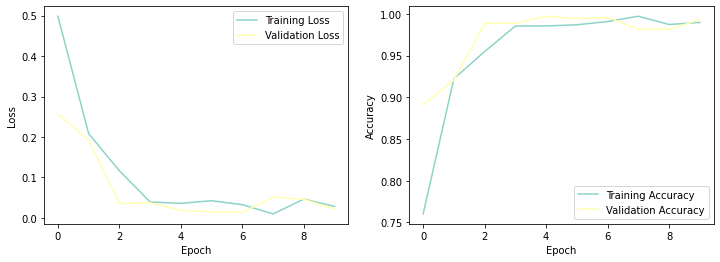

In [65]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [68]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=list(range(len(history.history['loss']))), y=history.history['loss'], mode='lines', name='Training Loss'))
fig.add_trace(go.Scatter(x=list(range(len(history.history['val_loss']))), y=history.history['val_loss'], mode='lines', name='Validation Loss'))

fig.update_layout(
    title='Training and Validation Loss Over Epochs',
    xaxis_title='Epoch',
    yaxis_title='Loss',
    template='plotly_dark',  
)

fig.add_trace(go.Scatter(x=list(range(len(history.history['accuracy']))), y=history.history['accuracy'], mode='lines', name='Training Accuracy'))
fig.add_trace(go.Scatter(x=list(range(len(history.history['val_accuracy']))), y=history.history['val_accuracy'], mode='lines', name='Validation Accuracy'))

fig.update_layout(
    title='Training and Validation Accuracy Over Epochs',
    xaxis_title='Epoch',
    yaxis_title='Accuracy',
    template='plotly_dark', 
)
fig.show()

In [66]:
model_new.save('my_model.h5')

In [67]:
model_json = model_new.to_json()
with open('my_model.json', 'w') as json_file:
    json_file.write(model_json)

model_new.save_weights('my_model_weights.h5')